# Flatmaps of final parcellation (probability maps of parcels)

In [1]:
import sys
import ProbabilisticParcellation.evaluate as ev
import ProbabilisticParcellation.util as ut
import ProbabilisticParcellation.export_atlas as ea
import ProbabilisticParcellation.scripts.atlas_paper.parcel_hierarchy as ph
import ProbabilisticParcellation.scripts.atlas_paper.evaluate_atlas as eva
from Functional_Fusion.dataset import *
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import torch as pt
import nitools as nt
import surfAnalysisPy as surf
atlas_dir = '/Volumes/diedrichsen_data$/data/Cerebellum/ProbabilisticParcellationModel/Atlases/'
conn_dir = '/Volumes/diedrichsen_data$/data/Cerebellum/connectivity/maps/'
surf_dir = surf.plot._surf_dir

# Clustered parcellation (32)
At K=32, medium level, clustered using assignment

In [12]:
patlas = nb.load(atlas_dir + 'NettekovenSym32_space-MNISymC2_probseg.nii')
_, cmap, labels = nt.read_lut(atlas_dir +
                              'NettekovenSym32.lut')

pseg = suit.flatmap.vol_to_surf(patlas, stats='nanmean',space='MNISymC')


In [3]:
pseg.shape

(28935, 32)

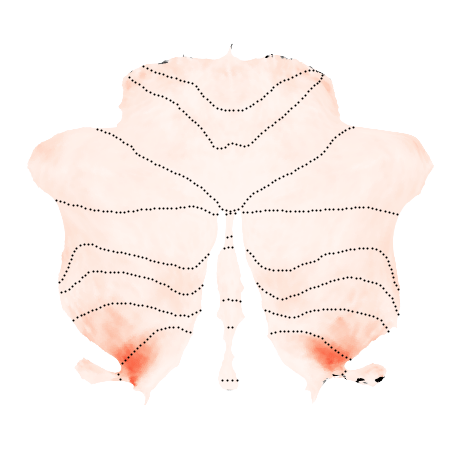

In [13]:
figsize = (8, 8)
reg='A4'
idx = np.array([l.startswith(reg) for l in labels[1:]])
p = pseg[:,idx].sum(axis=1)
plt.figure(figsize=figsize)
ax = suit.flatmap.plot(p,
                cscale=[0,0.4],
                render='matplotlib',
                cmap='Reds',
                new_figure=False,
                overlay_type='func',
                colorbar=False)


In [5]:
def annotate_axes(ax, text, fontsize=18):
    ax.text(0.5, 0.5, text, transform=ax.transAxes,
            ha="center", va="center", fontsize=fontsize, color="darkgrey")

Text(0.5, 0.98, 'Manually added subplots, spanning a column')

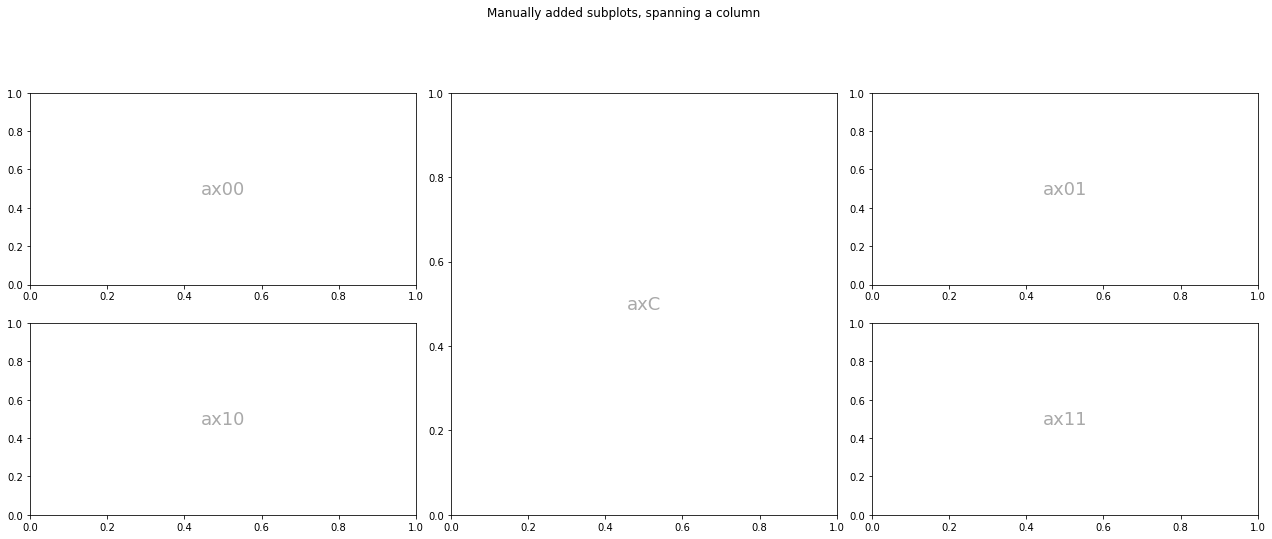

In [6]:

fig = plt.figure(figsize=(22, 12))
spec = fig.add_gridspec(3, 6)

axC = fig.add_subplot(spec[0:2,2:4])
annotate_axes(axC, 'axC')

axH = np.empty((2,2),dtype=object)
axH[0,0] = fig.add_subplot(spec[0, 0:2])
axH[1,0] = fig.add_subplot(spec[1, 0:2])
axH[0,1] = fig.add_subplot(spec[0, 4:])
axH[1,1] = fig.add_subplot(spec[1, 4:])

for h in range(2):
    for c in range(2):
        annotate_axes(axH[h,c], f'ax{h}{c}')

fig.suptitle('Manually added subplots, spanning a column')

<AxesSubplot:>

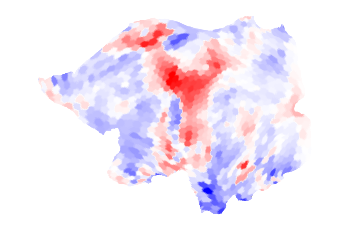

In [5]:
parcel=nb.load(conn_dir+'Fusion_L2_05.pscalar.nii')
flatL = nb.load(surf_dir+'/fs_L/fs_LR.32k.L.flat.surf.gii')
# ut.plot_connectivity_map(parcel)
weights=nt.cifti.surf_from_cifti(parcel)

surf.plot.plotmap(weights[0][3,:],flatL,underlay=None,overlay_type='func',cmap='bwr')

In [4]:
weights[0].shape

(32, 32492)